<a href="https://colab.research.google.com/github/YehorSavchenko/AnalitykaDanychUJ/blob/master/Cwiczenia1/Assignment_Optional_1_solution_YehorSavchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We have 2 datasets.


1.  survey_results_schema.csv
2.  survey_results_public.csv

First containts questions which were asked

Secons containts answers for questions


Link to datasets: https://insights.stackoverflow.com/survey


In [108]:
survey_df = pd.read_csv("survey_results_public.csv")
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [109]:
survey_categorical_df = survey_df.select_dtypes(include=['object'])
survey_numerical_df = survey_df.select_dtypes(include=['number'])
print(survey_categorical_df.keys())
print(survey_numerical_df.keys())

Index(['MainBranch', 'Hobbyist', 'Age1stCode', 'CompFreq', 'Country',
       'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear',
       'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity',
       'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear',
       'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith', 'WelcomeChange', 'YearsCode', '

In [110]:
schema_df = pd.read_csv('survey_results_schema.csv', index_col='Column')
schema_df.head(100)

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


The dataset contains over 64,000 responses to 60 questions

In [111]:
schema_raw = schema_df['QuestionText']
schema_raw 

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Here we can see common questions which were asked. Questions will help us create a statistic  about this dataset.

In [112]:
schema_raw['YearsCode']

'Including any education, how many years have you been coding in total?'

In [113]:
schema_raw['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

In [114]:
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

Let's start with the number of countries from which we got responses in the survey And show the ten countries with the highest number of responses

In [115]:
schema_raw['Country']

'Where do you live?'

In [116]:
survey_df['Country'].nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [117]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Name: Country, dtype: int64

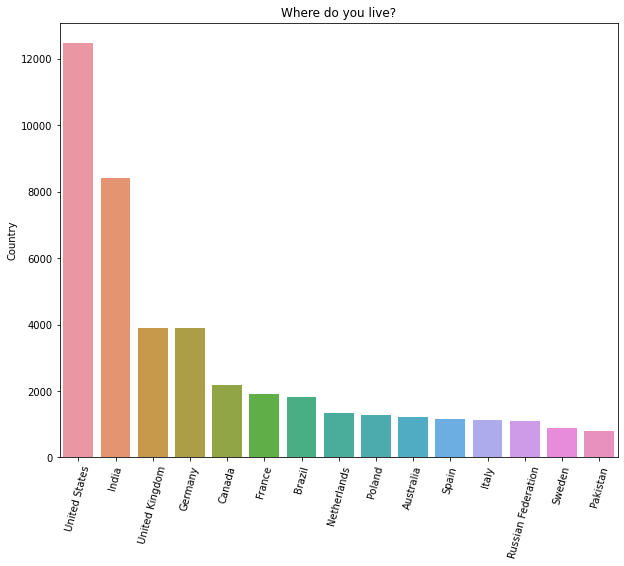

In [118]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=75)
plt.title(schema_raw['Country'])
sns.barplot(x=top_countries.index, y=top_countries);

We can see the highest number of responses from the United States and India. 
I think it is because the survey is in English and these countries have the highest English speaking people.

Here we will create a plot with age of people

In [119]:
schema_raw['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

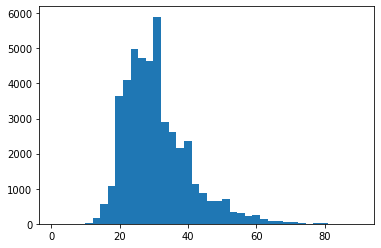

In [120]:
plt.hist(x=survey_df['Age'], bins=40, range=(1,90))
plt.show()

It appears that a large percentage of respondents are 20-40 years old.

Here we will see education of people

In [161]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed?'

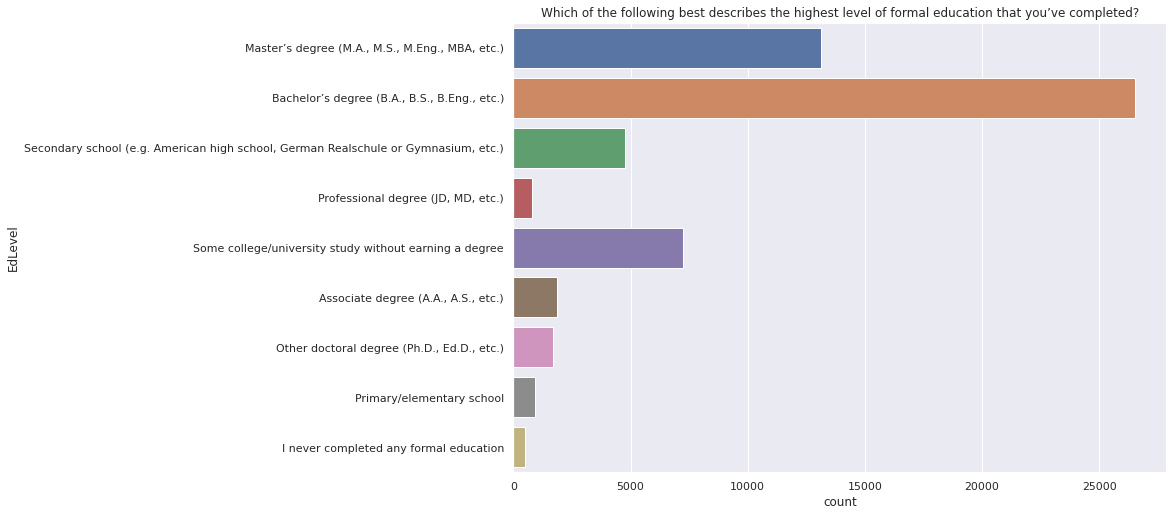

In [166]:
sns.countplot(y=survey_df.EdLevel)
plt.title(schema_raw['EdLevel'])
plt.show()

Formal education in computer science is often considered an essential requirement for becoming a programmer. But not all people have this level of education, because we have a lot of tutorials and courses on the internet

Also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [160]:
schema_raw['UndergradMajor']

'What was your primary field of study?'

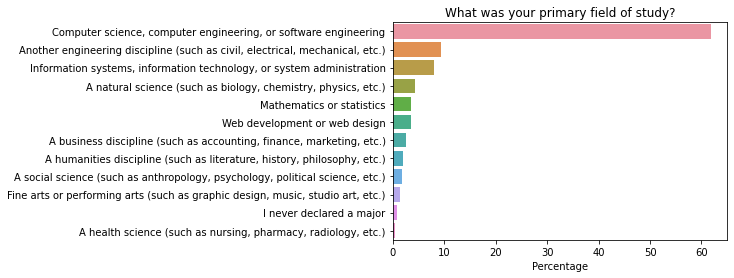

In [127]:
undergrad_percent = survey_df['UndergradMajor'].value_counts() * 100 / survey_df['UndergradMajor'].count()

sns.barplot(x=undergrad_percent, y=undergrad_percent.index)
plt.title(schema_raw['UndergradMajor'])
plt.xlabel('Percentage');
plt.show()

It turns out that 40% of programmers holding a college degree have a field of study other than computer science

Let's see a type of employment: full-time, part-time, student and etc.

In [128]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

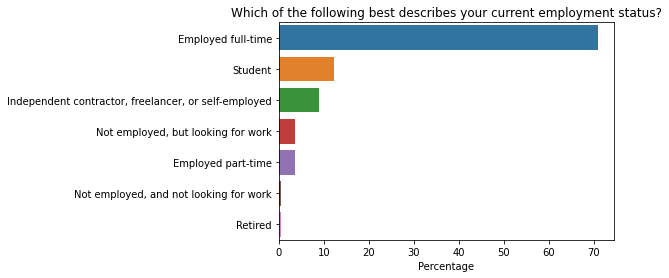

In [129]:
undergrad_percent = survey_df['Employment'].value_counts() * 100 / survey_df['Employment'].count()

sns.barplot(x=undergrad_percent, y=undergrad_percent.index)
plt.title(schema_raw['Employment'])
plt.xlabel('Percentage');

It turns out that about 70% are full-time employee. And it appears that close to 10% of respondents are employed part time or as freelancers.

Relationship between working hours and compensation for two countries: Poland & US.


But firstly let's see avatare hours per week:

In [140]:
schema_raw['WorkWeekHrs']

'On average, how many hours per week do you work? Please enter a whole number in the box.'

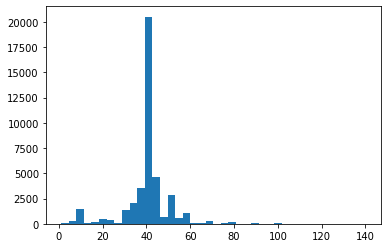

In [137]:
plt.hist(x=survey_df['WorkWeekHrs'], bins=40, range=(1,140))
plt.show()

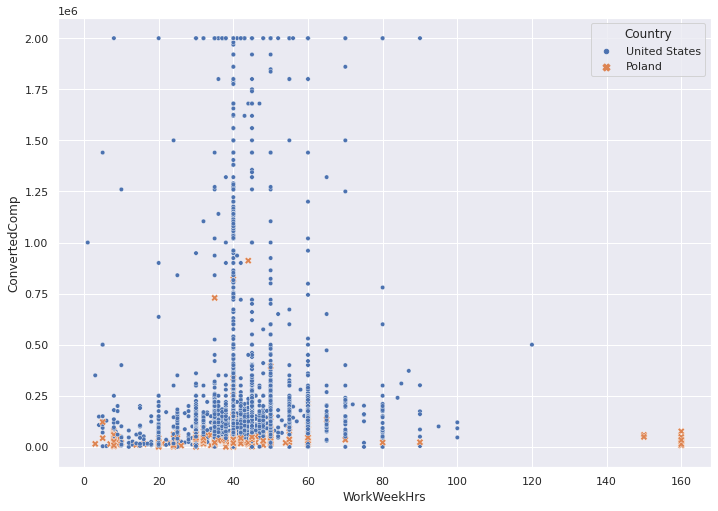

In [158]:
poland_df = survey_df[survey_df.Country.isin(['Poland','United States'])]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=poland_df, x="WorkWeekHrs", y="ConvertedComp", hue='Country',style='Country',size='Country',sizes=(50,20))

In [ ]:
#---------------------------------------------------------------------------------
# Not for presentation 
#---------------------------------------------------------------------------------

In [ ]:
trans_yes_answers_df = survey_df[survey_df['Trans']=='No'].reset_index(drop=True)
print(trans_yes_answers_df['Country'].value_counts())
print(sum(trans_yes_answers_df['Country'].value_counts()))

United States     10201
India              5221
Germany            3255
United Kingdom     3175
Canada             1782
                  ...  
Nauru                 1
Liechtenstein         1
Monaco                1
Niger                 1
Cape Verde            1
Name: Country, Length: 170, dtype: int64
48871


In [ ]:
trans_yes_answers_df = survey_df[survey_df['Trans'].isnull()].reset_index(drop=True)
print(trans_yes_answers_df['Country'].value_counts())
print(sum(trans_yes_answers_df['Country'].value_counts()))

India                               3163
United States                       2102
United Kingdom                       676
Germany                              609
Canada                               394
                                    ... 
Fiji                                   1
Chad                                   1
Democratic Republic of the Congo       1
Kiribati                               1
Monaco                                 1
Name: Country, Length: 174, dtype: int64
14727


In [ ]:
trans_yes_answers_df = survey_df[survey_df['Trans']=='Yes'].reset_index(drop=True)
print(trans_yes_answers_df['Country'].value_counts())
print(sum(trans_yes_answers_df['Country'].value_counts()))

United States     166
United Kingdom     45
Germany            26
India              19
Canada             15
                 ... 
Czech Republic      1
Zambia              1
Hungary             1
Albania             1
Cambodia            1
Name: Country, Length: 73, dtype: int64
474


In [ ]:
import folium 
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
country_counts = trans_yes_answers_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States,166
1,United Kingdom,45
2,Germany,26
3,India,19
4,Canada,15
...,...,...
68,Czech Republic,1
69,Zambia,1
70,Hungary,1
71,Albania,1


In [ ]:
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[13, 'Country'] = 'Russia'
country_counts_df

,Country,Count
0,United States of America,166
1,United Kingdom,45
2,Germany,26
3,India,19
4,Canada,15
...,...,...
68,Czech Republic,1
69,Zambia,1
70,Hungary,1
71,Albania,1


In [ ]:
map = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 5, 10, 25, 50, 80, 120, 168],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(map)

map